# Import Libraries and Create Basic Graphs

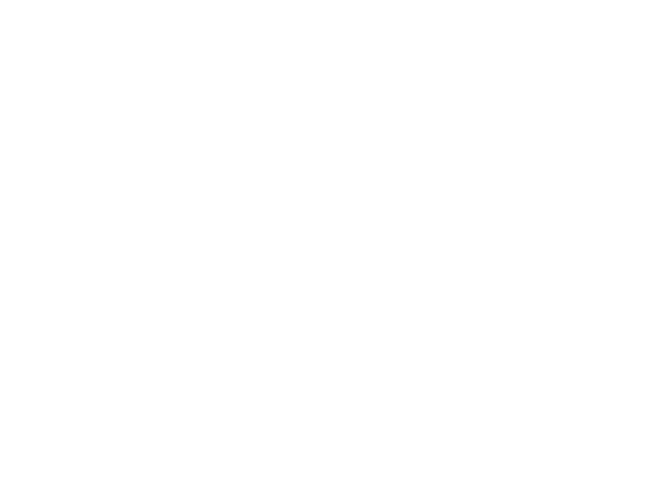

In [5]:
import networkx as nx
from matplotlib import pyplot as plt

# Create different types of graphs
# Graph(): undirected graph where edges have no direction
G = nx.Graph()

# DiGraph(): directed graph where edges have direction (A -> B is different from B -> A)
DG = nx.DiGraph()

# Create a layout for positioning nodes in 2D space
# spring_layout uses force-directed algorithm to position nodes
pos = nx.spring_layout(G)

# Draw the empty graph
nx.draw(G, pos)
plt.show()

# Adding Nodes to the Graph

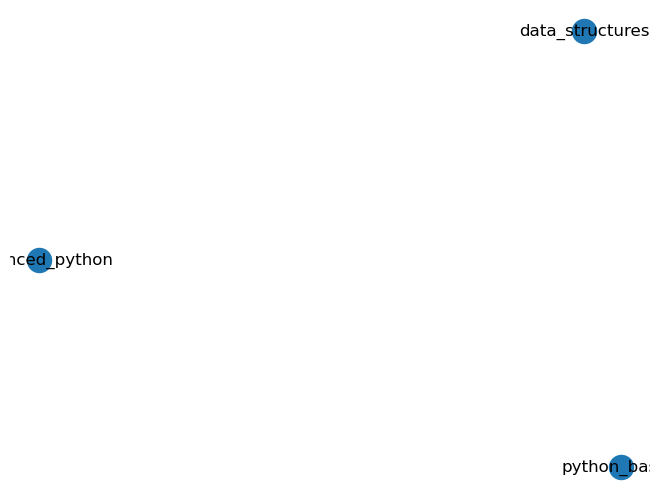

In [6]:
# Add a single node representing 'python_basics' topic
G.add_node('python_basics')

# Add multiple nodes at once using a list
G.add_nodes_from(['data_structures', 'advanced_python'])

# Visualize the graph with node labels
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

# Adding Edges (Connections Between Nodes)

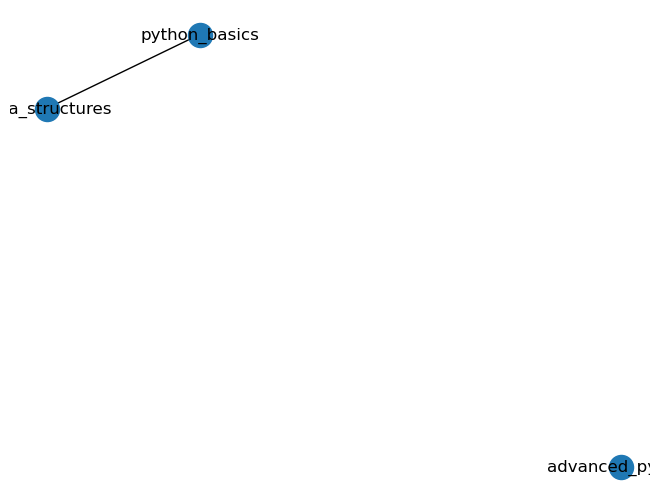

In [7]:
# Add a single edge connecting two nodes
# This creates a relationship between 'python_basics' and 'data_structures'
G.add_edge('python_basics', 'data_structures')

# Visualize the graph with the new edge
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

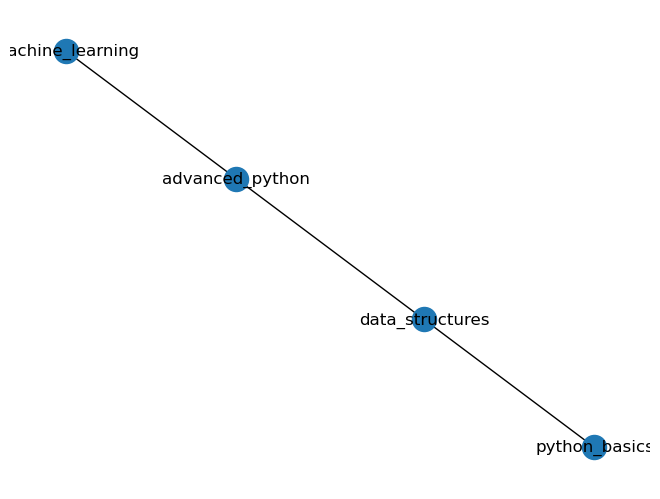

In [8]:
# Add multiple edges at once
# This creates a learning path: data_structures -> advanced_python -> machine_learning
G.add_edges_from([
    ('data_structures', 'advanced_python'),
    ('advanced_python', 'machine_learning')
])

# Visualize the complete graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

# Adding Attributes to Nodes and Edges

In [9]:
# Attributes transform a simple graph into a knowledge graph by adding metadata

# Define node attributes as a dictionary
# Each node has difficulty level and description
topics = {
    'python_basics': {'difficulty': 'beginner', 'description': 'Basic Python concepts'},
    'data_structures': {'difficulty': 'intermediate', 'description': 'Data structures'},
    'advanced_python': {'difficulty': 'advanced', 'description': 'Advanced Python techniques'},
    'machine_learning': {'difficulty': 'expert', 'description': 'Introduction to ML'}
}

# Update each node with its attributes
for node, attrs in topics.items():
    G.nodes[node].update(attrs)

# Define edge attributes
# weight: indicates connection strength or importance
# prerequisite: indicates if one topic must be learned before another
edge_attributes = {
    ('python_basics', 'data_structures'): {'weight': 1.0, 'prerequisite': True},
    ('data_structures', 'advanced_python'): {'weight': 1.5, 'prerequisite': True},
    ('advanced_python', 'machine_learning'): {'weight': 2.0, 'prerequisite': True}
}

# Update each edge with its attributes
for edge, attrs in edge_attributes.items():
    G.edges[edge].update(attrs)

# Visualizing Graphs with Attributes

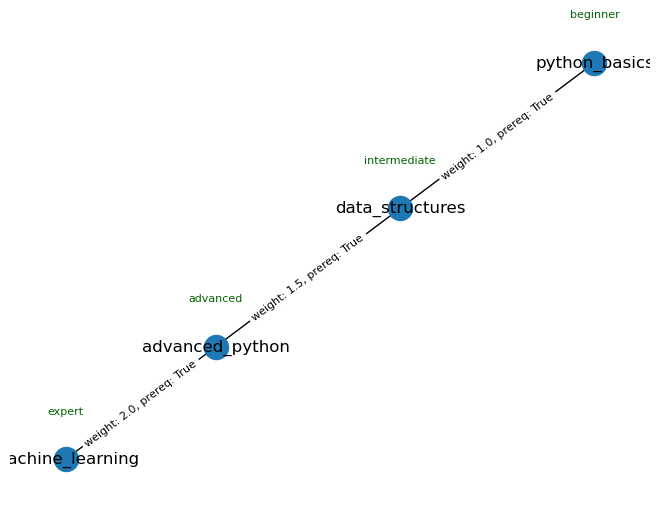

In [11]:
# Calculate node positions
pos = nx.spring_layout(G)

# Draw the basic graph structure
nx.draw(G, pos, with_labels=True)

# Extract difficulty level for each node to display as labels
node_labels = {node: data['difficulty'] for node, data in G.nodes(data=True)}

# Add node attributes below each node with offset positioning
for node, (x, y) in pos.items():
    plt.text(x, y + 0.1, node_labels[node], fontsize=8, ha='center', color='darkgreen')

# Create edge labels showing weight and prerequisite status
edge_labels = {(u, v): f"weight: {d['weight']}, prereq: {d['prerequisite']}"
               for u, v, d in G.edges(data=True)}

# Display edge labels on the graph
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.show()

# Building a Complete Learning Path Knowledge Graph

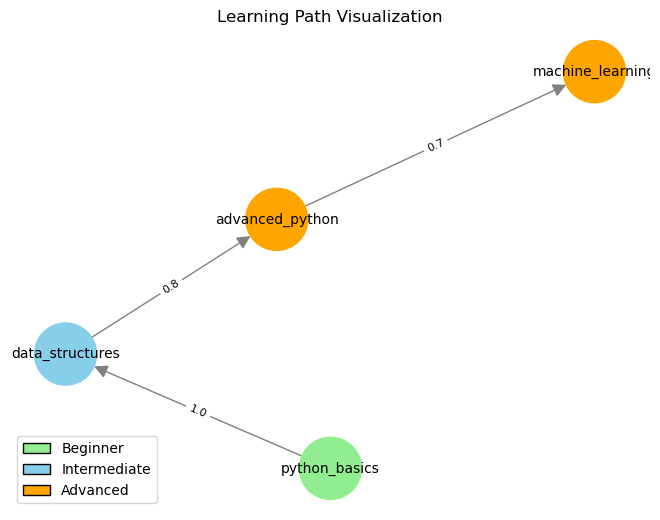

In [12]:
# Define topics with metadata
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'}
}

# Define relationships with edge weights
# Lower weights can indicate easier transitions or stronger connections
relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7})
]

# Create a directed graph (order matters in learning paths)
G = nx.DiGraph()

# Add all nodes with their metadata
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)

# Add all edges with their attributes
G.add_edges_from(relationships)

# Calculate layout for visualization
pos = nx.spring_layout(G)

# Define color mapping based on difficulty level
node_colors = {
    'beginner': 'lightgreen',
    'intermediate': 'skyblue',
    'advanced': 'orange'
}

# Create a list of colors for each node based on its difficulty
node_color_list = [node_colors[data['difficulty']] for _, data in G.nodes(data=True)]

# Draw the graph with customized appearance
nx.draw(
    G, pos, 
    with_labels=True,           # Show node names
    node_color=node_color_list, # Color nodes by difficulty
    node_size=2000,             # Size of nodes
    font_size=10,               # Font size for labels
    arrowsize=20,               # Size of arrows for directed edges
    edge_color='gray'           # Color of edges
)

# Create edge labels showing weights
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add a legend explaining node colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='Beginner'),
    Patch(facecolor='skyblue', edgecolor='black', label='Intermediate'),
    Patch(facecolor='orange', edgecolor='black', label='Advanced')
]
plt.legend(handles=legend_elements, loc='lower left')
plt.title("Learning Path Visualization", fontsize=12)
plt.show()

# Basic Graph Analysis

In [14]:
# Get the total number of nodes (topics) in the graph
print(f"Number of nodes: {G.number_of_nodes()}")

# Get the total number of edges (connections) in the graph
print(f"Number of edges: {G.number_of_edges()}")

# Get all neighbors (directly connected nodes) of a specific node
# In a directed graph, neighbors are nodes that the current node points to
print(f"Neighbors of python_basics: {list(G.neighbors('data_structures'))}")

# Get the degree (number of connections) for a specific node
# In directed graphs, this is the sum of in-degree and out-degree
print(f"Degree of data_structures: {G.degree['data_structures']}")

Number of nodes: 4
Number of edges: 3
Neighbors of python_basics: ['advanced_python']
Degree of data_structures: 2


# Graph Algorithms - Paths and Centrality

Shortest Path 1: ['python_basics', 'data_structures', 'advanced_python', 'machine_learning']
Shortest Path 2: ['python_basics', 'data_structures', 'advanced_python', 'machine_learning', 'deep_learning']
Betweenness Centrality: {'python_basics': 0.0, 'data_structures': 0.25, 'advanced_python': 0.3333333333333333, 'machine_learning': 0.25, 'deep_learning': 0.0}
Is the graph connected? True


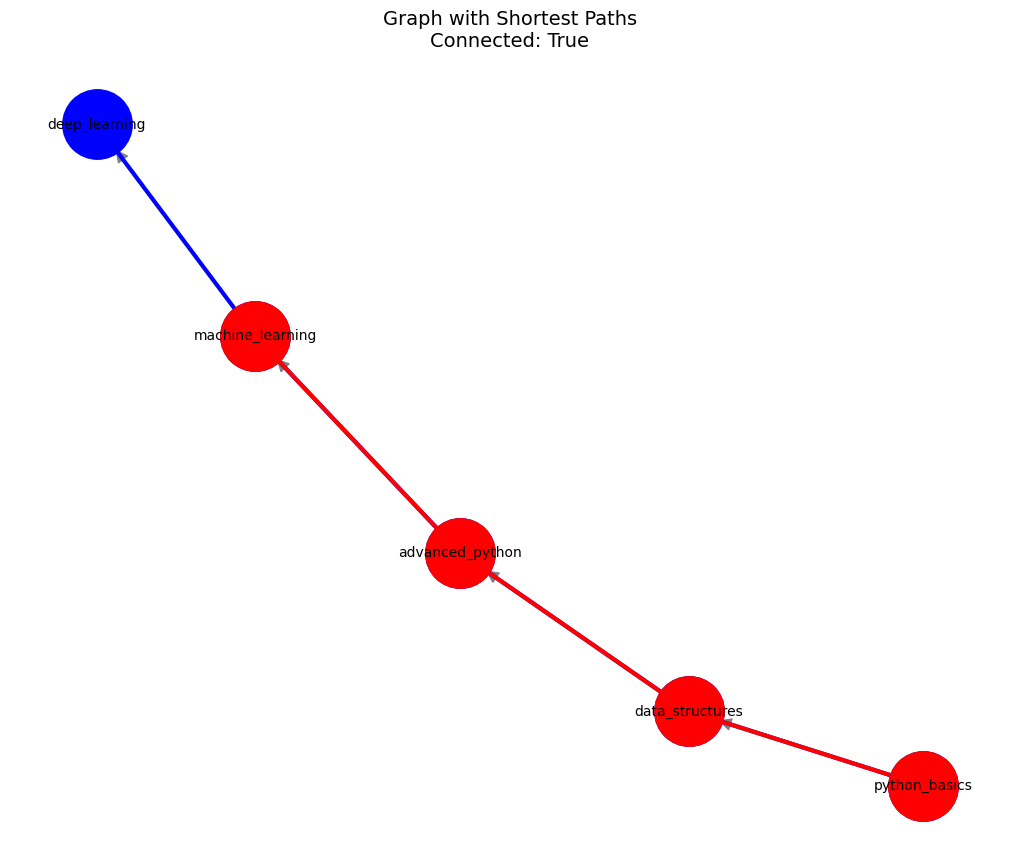

In [16]:
# Expand the graph with an additional node
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6})
]

# Recreate the graph with new structure
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
G.add_edges_from(relationships)

# Find the shortest path between two nodes
# This shows the minimum number of steps needed to go from start to end
shortest_path_1 = nx.shortest_path(G, 'python_basics', 'machine_learning')
shortest_path_2 = nx.shortest_path(G, 'python_basics', 'deep_learning')
print(f"Shortest Path 1: {shortest_path_1}")
print(f"Shortest Path 2: {shortest_path_2}")

# Calculate betweenness centrality for all nodes
# Measures how often a node appears on shortest paths between other nodes
# High values indicate "bridge" nodes that connect different parts of the graph
centrality = nx.betweenness_centrality(G)
print(f"Betweenness Centrality: {centrality}")

# Check if all nodes are connected (in undirected version)
# Returns True if you can reach any node from any other node
is_connected = nx.is_connected(G.to_undirected())
print(f"Is the graph connected? {is_connected}")

# Visualize with highlighted paths
pos = nx.spring_layout(G)
node_colors = {'beginner': 'lightgreen', 'intermediate': 'skyblue', 'advanced': 'orange'}
node_color_list = [node_colors[data['difficulty']] for _, data in G.nodes(data=True)]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color=node_color_list,
        node_size=2000, font_size=10, arrowsize=20, edge_color='gray')

# Highlight shortest path 2 in blue
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_2, node_color='blue', node_size=2500)
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path_2[i], shortest_path_2[i+1]) 
                                          for i in range(len(shortest_path_2)-1)], 
                       edge_color='blue', width=3)

# Highlight shortest path 1 in red
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_1, node_color='red', node_size=2500)
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path_1[i], shortest_path_1[i+1]) 
                                          for i in range(len(shortest_path_1)-1)], 
                       edge_color='red', width=3)

plt.title(f"Graph with Shortest Paths\nConnected: {is_connected}", fontsize=14)
plt.show()

# Storing Graph Data

In [17]:
# Save graph to GraphML format (XML-based format for graphs)
# This allows you to load the graph later or share it with others
nx.write_graphml(G, "learning_path.graphml")

# Example of how you might store in SQL database
# (Commented out as it's just an example structure)
"""
cursor.execute('''
CREATE TABLE IF NOT EXISTS topics (
    id TEXT PRIMARY KEY,
    metadata TEXT
)
''')
"""

"\ncursor.execute('''\nCREATE TABLE IF NOT EXISTS topics (\n    id TEXT PRIMARY KEY,\n    metadata TEXT\n)\n''')\n"

# Advanced Centrality Metrics

Degree Centrality: {'python_basics': 0.25, 'data_structures': 0.5, 'advanced_python': 0.5, 'machine_learning': 0.5, 'deep_learning': 0.25}
Betweenness Centrality: {'python_basics': 0.0, 'data_structures': 0.25, 'advanced_python': 0.3333333333333333, 'machine_learning': 0.25, 'deep_learning': 0.0}
Closeness Centrality: {'python_basics': 0.0, 'data_structures': 0.25, 'advanced_python': 0.3333333333333333, 'machine_learning': 0.375, 'deep_learning': 0.4}


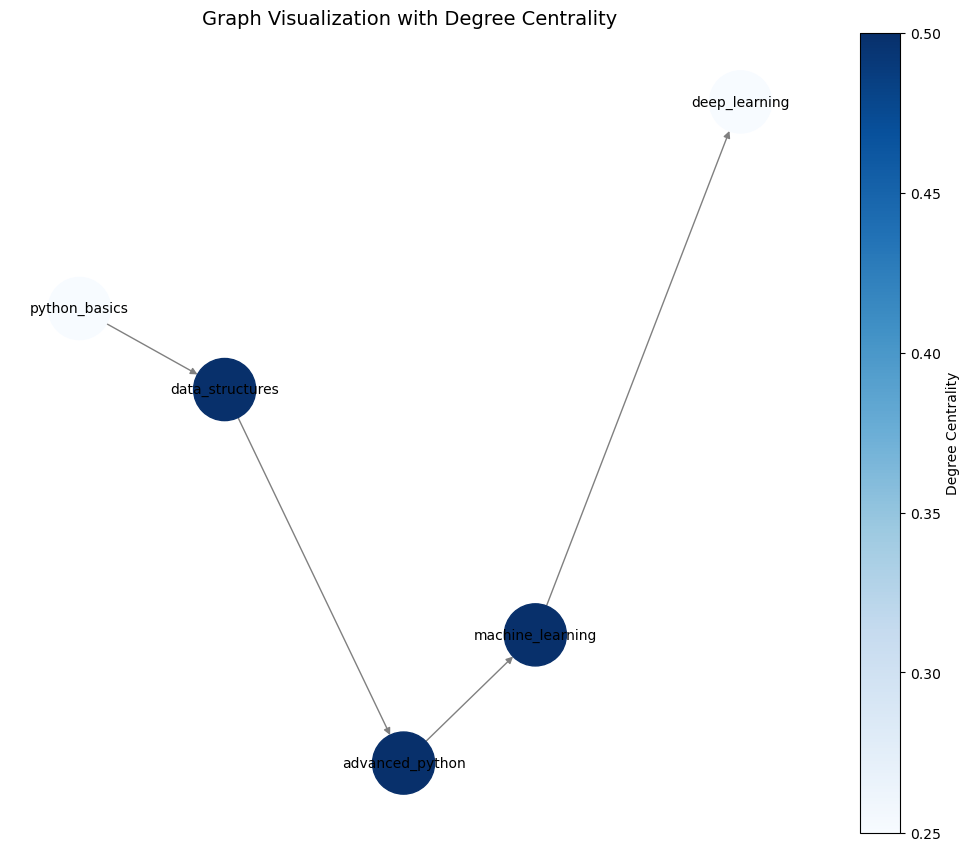

In [18]:
# Degree centrality: proportion of nodes each node is connected to
# Higher values mean more direct connections
degree_cent = nx.degree_centrality(G)
print(f"Degree Centrality: {degree_cent}")

# Betweenness centrality: how often a node is on shortest paths
# High values indicate important "bridge" nodes
between_cent = nx.betweenness_centrality(G)
print(f"Betweenness Centrality: {between_cent}")

# Closeness centrality: how close a node is to all other nodes
# Higher values mean a node can reach others more quickly
# NetworkX's closeness_centrality() for directed graphs calculates 
# how easily OTHER nodes can reach THIS node, not how easily this node can reach others!
close_cent = nx.closeness_centrality(G)
print(f"Closeness Centrality: {close_cent}")

# Visualize with nodes colored by degree centrality
pos = nx.spring_layout(G)
node_color_degree = [degree_cent[node] for node in G.nodes]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color=node_color_degree,
        node_size=2000, font_size=10, cmap=plt.cm.Blues, edge_color='gray')

plt.title("Graph Visualization with Degree Centrality", fontsize=14)

# Add a color bar to show the scale of degree centrality values
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, 
                           norm=plt.Normalize(vmin=min(node_color_degree), 
                                            vmax=max(node_color_degree)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Degree Centrality")
plt.show()

# Community Detection and Path Analysis


--- Community Detection ---
Community 1: frozenset({'advanced_python', 'machine_learning', 'deep_learning'})
Community 2: frozenset({'data_structures', 'python_basics'})

--- All Paths ---
['python_basics', 'data_structures', 'advanced_python', 'machine_learning']

--- Cycles ---
No cycles detected.

--- Connected Components ---
Component: {'advanced_python', 'python_basics', 'data_structures', 'machine_learning', 'deep_learning'}


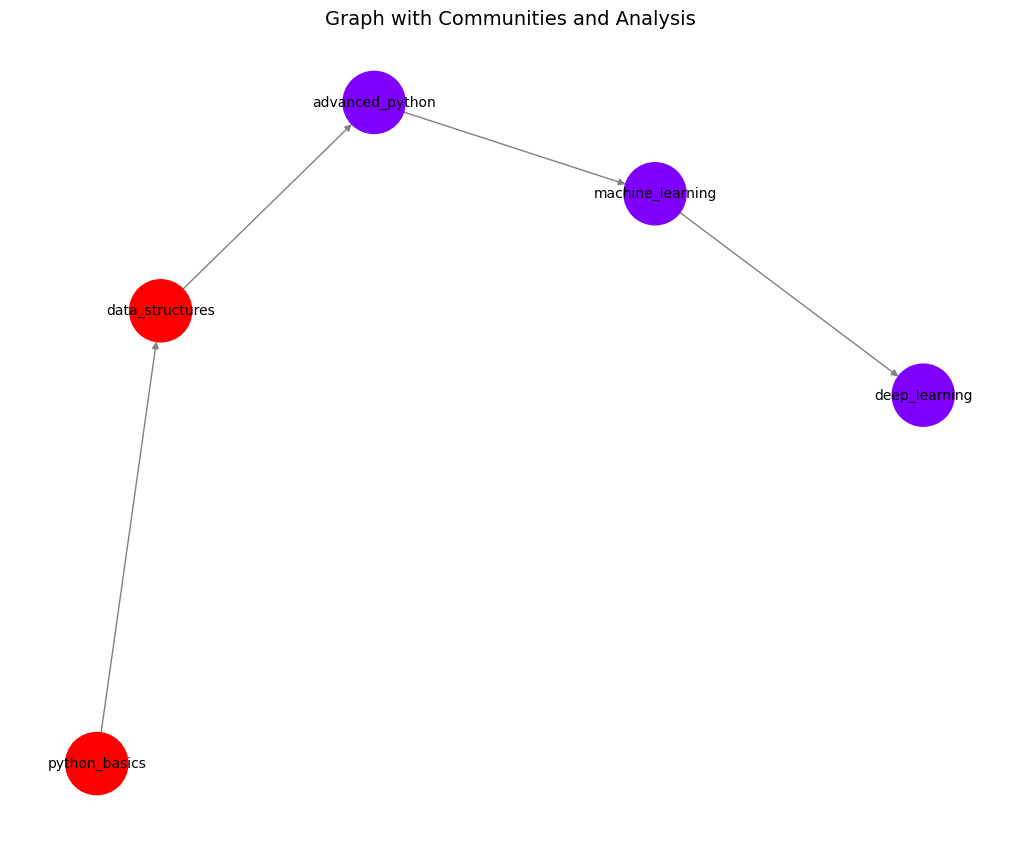

In [19]:
# Community detection identifies groups of nodes that are densely connected
# Nodes in the same community have more connections to each other

# This is a community detection algorithm from NetworkX that finds groups of nodes that are more densely connected to each other than to the rest of the network.
# What is Modularity?
# Modularity is a measure (between -1 and 1) that quantifies how well a network is divided into communities:

# High modularity (~0.3 to 0.7): Strong community structure - many edges within communities, few between them
# Low/negative modularity: Poor division - connections are random or evenly distributed

# How the Greedy Algorithm Works
# The algorithm uses a greedy optimization approach:

# Initialize: Each node starts in its own community

# Merge Phase:

# Calculate modularity gain for merging each pair of communities
# Merge the pair that gives the largest modularity increase
# Repeat until no merge improves modularity

# Return: The final set of communities with maximum modularity
communities = list(nx.community.greedy_modularity_communities(G))
print("\n--- Community Detection ---")
for idx, community in enumerate(communities):
    print(f"Community {idx + 1}: {community}")

# Find all simple paths between two nodes (no repeated nodes)
# Useful for finding alternative learning routes
all_paths = list(nx.all_simple_paths(G, 'python_basics', 'machine_learning'))
print("\n--- All Paths ---")
for path in all_paths:
    print(path)

# Detect cycles (circular dependencies)
# In learning paths, cycles might indicate prerequisite conflicts
cycles = list(nx.simple_cycles(G))
print("\n--- Cycles ---")
if cycles:
    for cycle in cycles:
        print(f"Cycle: {cycle}")
else:
    print("No cycles detected.")

# Find connected components (groups of nodes that can reach each other)
# Multiple components mean the graph is disconnected
components = list(nx.connected_components(G.to_undirected()))
print("\n--- Connected Components ---")
for component in components:
    print(f"Component: {component}")

# Visualize communities with different colors
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))

# Assign colors to nodes based on their community
community_color_map = {}
for idx, community in enumerate(communities):
    for node in community:
        community_color_map[node] = idx

node_color_communities = [community_color_map.get(node, -1) for node in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=node_color_communities,
        node_size=2000, font_size=10, cmap=plt.cm.rainbow, edge_color='gray')

plt.title("Graph with Communities and Analysis", fontsize=14)
plt.show()

# Practical Applications


--- Similar Topics (Jaccard Coefficient) ---
Similarity between 'data_structures' and 'machine_learning': 0.33

Prerequisites for 'machine_learning': {'advanced_python', 'data_structures', 'python_basics'}
Descendants of 'python_basics': {'advanced_python', 'data_structures', 'machine_learning', 'deep_learning'}

Impact of removing 'data_structures': 3 affected topics


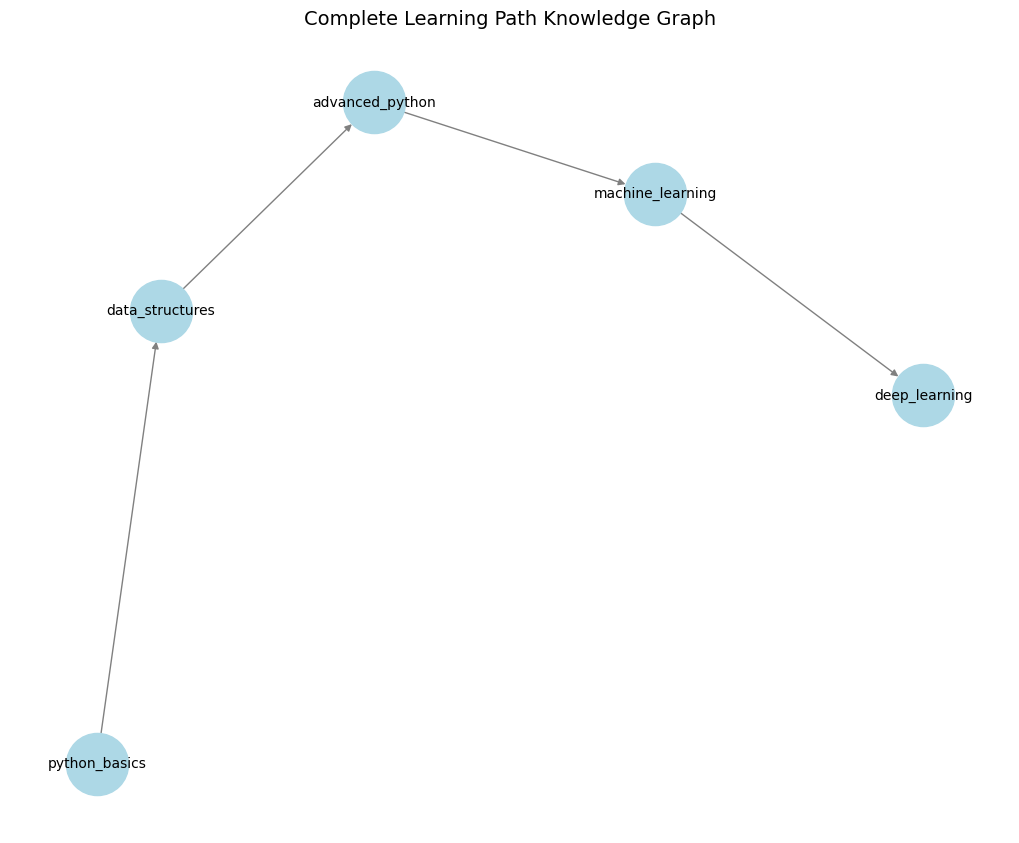

In [20]:
# Convert to undirected graph for similarity calculations
G_undirected = G.to_undirected()

# Jaccard coefficient measures similarity based on shared neighbors
# Values range from 0 (no similarity) to 1 (identical neighbors)
# Jaccard(A, B) = |neighbors(A) ∩ neighbors(B)| / |neighbors(A) ∪ neighbors(B)|

# Interpretation

# 1.0: Identical neighbors (perfect similarity)
# 0.5: Half of neighbors are shared (moderate similarity)
# 0.0: No shared neighbors (no similarity)
similar_topics = list(nx.jaccard_coefficient(G_undirected, 
                                             [('data_structures', 'machine_learning')]))
print("\n--- Similar Topics (Jaccard Coefficient) ---")
for u, v, p in similar_topics:
    print(f"Similarity between '{u}' and '{v}': {p:.2f}")

# Find ancestors (all nodes that must come before a given node)
# Useful for identifying all prerequisites
ancestors = nx.ancestors(G, 'machine_learning')
print(f"\nPrerequisites for 'machine_learning': {ancestors}")

# Find descendants (all nodes that come after a given node)
# Shows all topics that depend on a specific topic
descendants = nx.descendants(G, 'python_basics')
print(f"Descendants of 'python_basics': {descendants}")

# Calculate impact of removing a node
# Shows how many topics would become inaccessible
impact = len(nx.descendants(G, 'data_structures'))
print(f"\nImpact of removing 'data_structures': {impact} affected topics")

# Final visualization
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=2000, font_size=10, edge_color='gray')
plt.title("Complete Learning Path Knowledge Graph", fontsize=14)
plt.show()